# Algoritmo KMeans - voltado para séries temporais

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo KMeans](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV, train_test_split
from tslearn.clustering import TimeSeriesKMeans
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [4]:
# model = TimeSeriesKMeans(n_clusters = 7,
#                          max_iter = 300,
#                          tol = 0.0004,
#                          n_init = 3,
#                          metric = "euclidean", # {“euclidean”, “dtw”, “softdtw”}
#                          max_iter_barycenter = 300,
#                          n_jobs = -1,
#                          random_state = 42,
#                          init = "k-means++") # "k-means++", "random"

### Divisao - treino / teste

In [5]:
X_train, X_test = train_test_split(df_ureia.iloc[:, 0:6], test_size = 0.3, random_state = 42)
y_train, y_test = train_test_split(df_ureia.iloc[:, 7:], test_size = 0.3, random_state = 42)

### Teste com iteração por laço `for`

In [6]:
soma_dos_quadrados_ureia = []

for i in range(2, 20):
    kmeans = TimeSeriesKMeans(n_clusters = i,
                              max_iter = 300,
                              tol = 0.00001,
                              n_init = 1,
                              metric = "euclidean",
                              max_iter_barycenter = 100,
                              n_jobs = -1,
                              random_state = 42,
                              init = "k-means++")
    kmeans.fit(X_train)
    soma_dos_quadrados_ureia.append(kmeans.inertia_)

#### Imprimindo o resultado dos testes

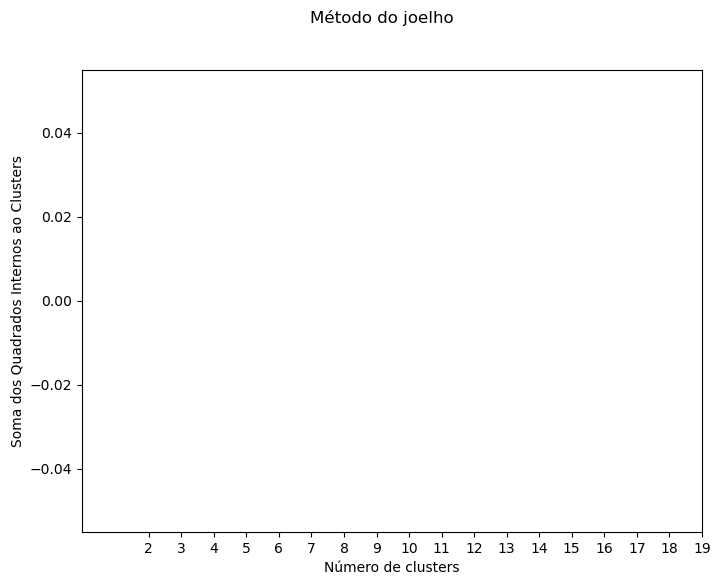

In [7]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_ureia, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos um único joelho em:
- x = `3`.